In [1]:
#importing libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2
import tensorflow as tf

# Importing Deep Learning Libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

2024-06-10 21:44:59.633951: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-10 21:44:59.656210: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-10 21:45:00.011434: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
picture_size = 48
folder_path = "../data/images/"


batch_size  = 64

datagen_train  = ImageDataGenerator(rescale=1.0/255.0)
datagen_val = ImageDataGenerator(rescale=1.0/255.0)

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Parameters
batch_size = 64
picture_size = 48  # Assuming this is predefined
num_classes = 7  # Adjust this based on your dataset

# Load your pre-trained VGG-like model
model_path = '/home/thor_01/Documents/EC/tensorflow/VGG_emo_gender_classifier/trainined_models/gender_VGG_v2.h5'
model = tf.keras.models.load_model(model_path)

# Remove the last layer (output layer)
model.pop()

# Add a new output layer for 7 classes with a unique name
num_classes = 7
model.add(Dense(num_classes, activation='softmax', name='output_dense_7_classes'))  # Unique name specified

# Freeze all layers up to the end of Block 2. The indices of these layers need to be adjusted based on your model's architecture.
for layer in model.layers[:25]:  # Adjust this index to freeze all layers before Block 3
    layer.trainable = False

# Make sure layers from Block 3 onwards are trainable
for layer in model.layers[16:]:  # This starts from Block 3
    layer.trainable = True

# Callbacks
checkpoint = ModelCheckpoint("./emotion_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train the model
model.fit(train_set, epochs=100, validation_data=test_set, callbacks=callbacks_list)


Epoch 1/100


2024-06-10 22:04:18.273915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-06-10 22:04:18.897201: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


448/451 [============================>.] - ETA: 0s - loss: 1.5464 - accuracy: 0.4060

2024-06-10 22:04:23.523439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_accuracy improved from -inf to 0.51076, saving model to ./emotion_model.h5
451/451 [==============================] - 6s 9ms/step - loss: 1.5453 - accuracy: 0.4064 - val_loss: 1.2690 - val_accuracy: 0.5108 - lr: 0.0010
Epoch 2/100
449/451 [============================>.] - ETA: 0s - loss: 1.2309 - accuracy: 0.5343
Epoch 2: val_accuracy improved from 0.51076 to 0.57232, saving model to ./emotion_model.h5
451/451 [==============================] - 4s 9ms/step - loss: 1.2313 - accuracy: 0.5341 - val_loss: 1.1272 - val_accuracy: 0.5723 - lr: 0.0010
Epoch 3/100
449/451 [============================>.] - ETA: 0s - loss: 1.1132 - accuracy: 0.5818
Epoch 3: val_accuracy improved from 0.57232 to 0.59227, saving model to ./emotion_model.h5
451/451 [==============================] - 4s 9ms/step - loss: 1.1138 - accuracy: 0.5818 - val_loss: 1.0838 - val_accuracy: 0.5923 - lr: 0.0010
Epoch 4/100
449/451 [============================>.] - ETA: 0s - loss: 1.0216 - accuracy: 0.6184
Epoch 

In [19]:
for layer in model.layers:
    print(f'{layer} is trainable: {layer.trainable}')

<keras.layers.convolutional.conv2d.Conv2D object at 0x71711bf929b0> is trainable: False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x71711bf938b0> is trainable: False
<keras.layers.core.activation.Activation object at 0x71711bf927d0> is trainable: False
<keras.layers.convolutional.conv2d.Conv2D object at 0x71711bf90490> is trainable: False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x71711bfd3d00> is trainable: False
<keras.layers.core.activation.Activation object at 0x7171381aed70> is trainable: False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x71711bf927a0> is trainable: False
<keras.layers.regularization.dropout.Dropout object at 0x71715821e860> is trainable: False
<keras.layers.convolutional.conv2d.Conv2D object at 0x71711bfd1c60> is trainable: False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x71711bfd12d0> is trainable: False
<keras.layers.core.activation.Activat

In [20]:
import cv2
import tensorflow as tf

# Define the mapping dictionary
categories = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

def detect_faces_and_classify(image_path, model, categories):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Load the Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # Crop the face
        face = gray[y:y+h, x:x+w]
        # Resize the face to 48x48
        face_resized = cv2.resize(face, (48, 48))
        # Normalize the face
        face_resized = face_resized / 255.0
        # Add channel and batch dimensions
        face_resized = np.expand_dims(face_resized, axis=-1)
        face_resized = np.expand_dims(face_resized, axis=0)
        
        # Predict the class
        prediction = model.predict(face_resized)
        class_idx = np.argmax(prediction)
        label = categories[class_idx]
        
        # Draw rectangle around the face
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        # Put label text above the rectangle
        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    # Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide the axis
    plt.show()

1/1 [==============================] - 0s 10ms/step


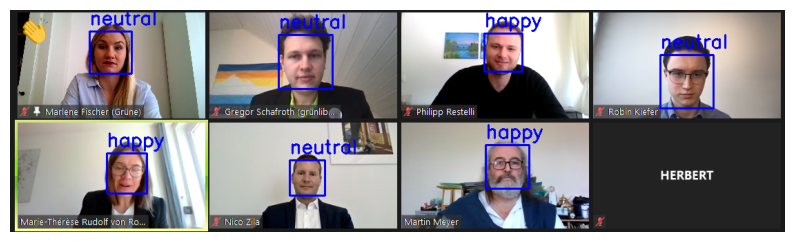

In [21]:
# Example usage
image_path = '/home/thor_01/Documents/EC/tensorflow/VGG_emo_gender_classifier/test_images/BBZ-1123x0-c-default.png'
detect_faces_and_classify(image_path, model, categories)

1/1 [==============================] - 0s 10ms/step


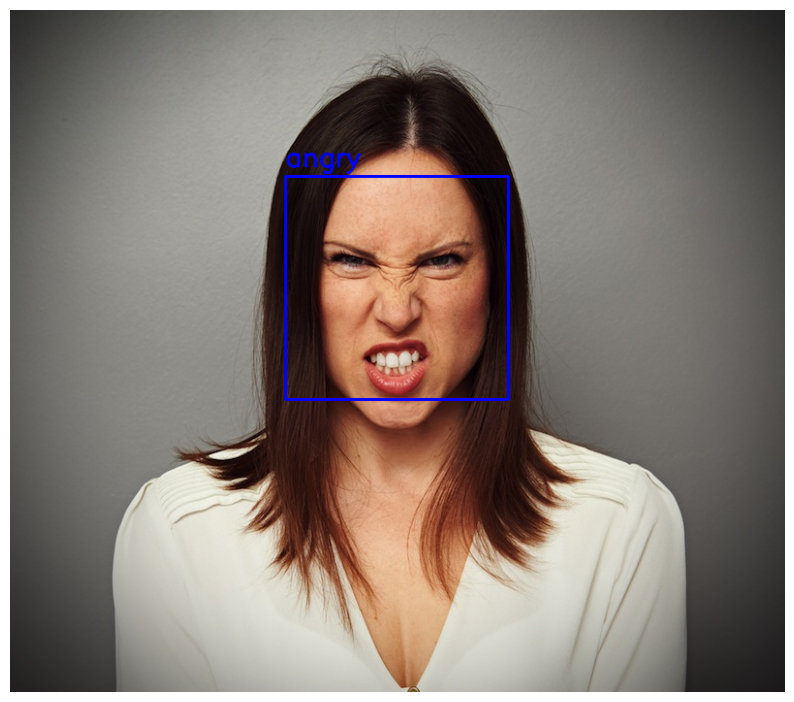

In [22]:
# Example usage
image_path = '/home/thor_01/Documents/EC/tensorflow/VGG_emo_gender_classifier/test_images/DMUbjq2UjJcG3umGv3Qjjd.jpeg'
detect_faces_and_classify(image_path, model, categories)

1/1 [==============================] - 0s 10ms/step


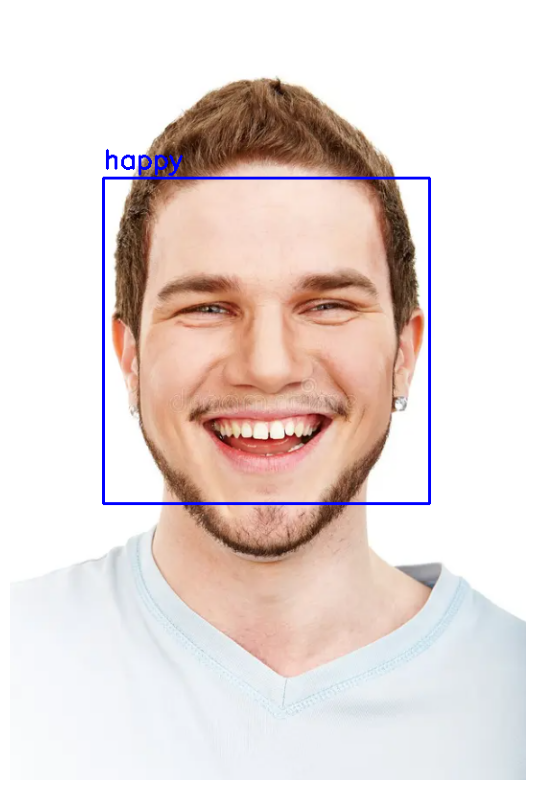

In [23]:
# Example usage
image_path = '/home/thor_01/Documents/EC/tensorflow/VGG_emo_gender_classifier/test_images/happy4.png'
detect_faces_and_classify(image_path, model, categories)

1/1 [==============================] - 0s 10ms/step


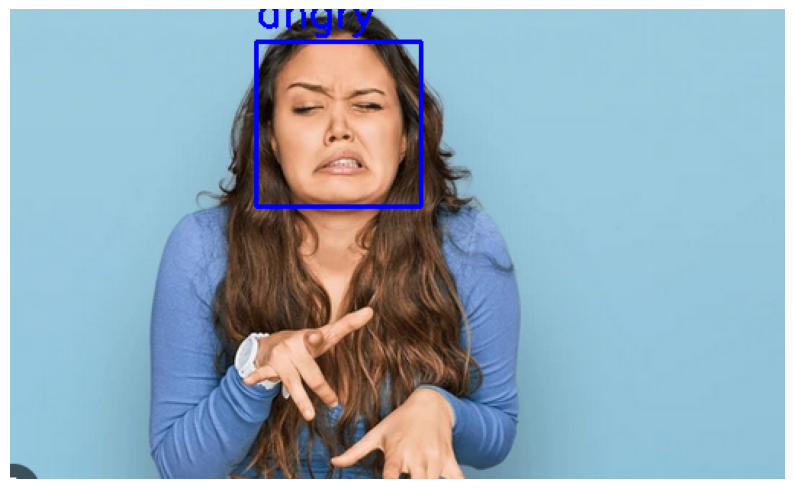

In [24]:
# Example usage
image_path = '/home/thor_01/Documents/EC/tensorflow/VGG_emo_gender_classifier/test_images/woman2.png'
detect_faces_and_classify(image_path, model, categories)

1/1 [==============================] - 0s 10ms/step


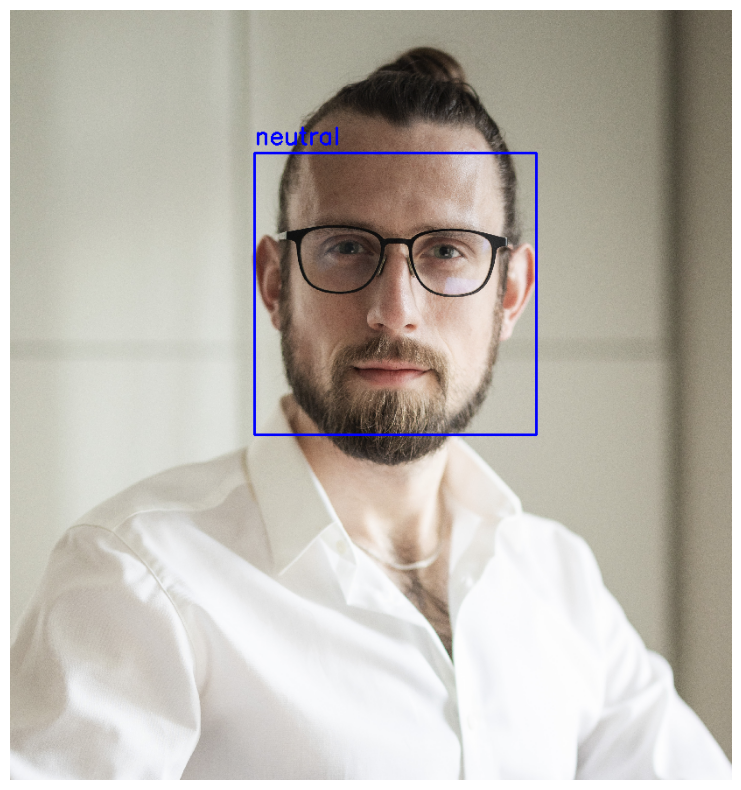

In [25]:
# Example usage
image_path = '/home/thor_01/Documents/EC/tensorflow/VGG_emo_gender_classifier/test_images/sthor.png'
detect_faces_and_classify(image_path, model, categories)

1/1 [==============================] - 0s 10ms/step


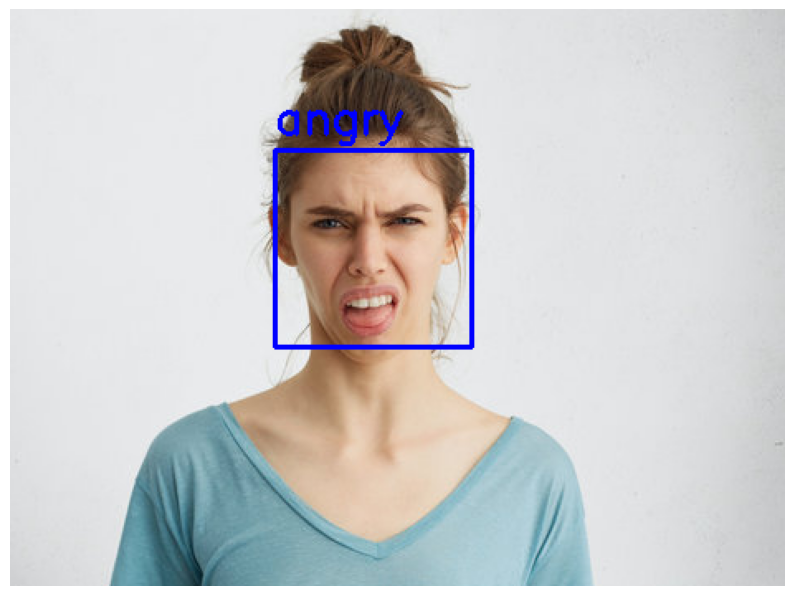

In [26]:
# Example usage
image_path = '/home/thor_01/Documents/EC/tensorflow/VGG_emo_gender_classifier/test_images/disg.png'
detect_faces_and_classify(image_path, model, categories)

1/1 [==============================] - 0s 10ms/step


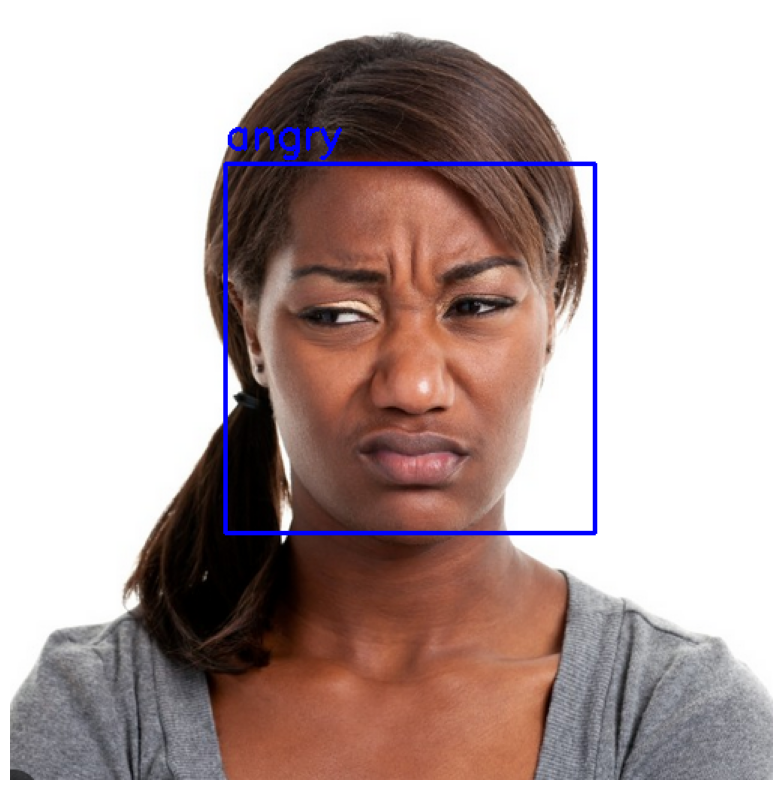

In [27]:
# Example usage
image_path = '/home/thor_01/Documents/EC/tensorflow/VGG_emo_gender_classifier/test_images/disg2.png'
detect_faces_and_classify(image_path, model, categories)

In [16]:
model.save('emotion_VGG_finetune.h5')